# Лаболаторная работа №6
## Вариант 7

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import math

%matplotlib inline
plt.style.use('fast')

In [2]:
def empiric_cdf(y, n, value):
  return np.sum([i<=value for i in y])/n
def empiric_cdf_list(x, y, n):
  return [empiric_cdf(y, n, i) for i in x]
def print_stat(values):
  if len(values) == 0:
    return
  if type(values[0]) == str:
    v, counts = np.unique(values, return_counts= True )
    mode_value = v[np.argwhere (counts == np.max (counts))][0][0]
    print(f"Выборочная мода..............................: {mode_value} - самое популярное значение признака")
  if type(values[0]) in (int, float, np.int64, np.float64):
    print(f"""Выборочная мода..............................: {sts.mode(values).mode:.02f} - самое популярное значение признака
Выборочное cреднее значение..................: {np.average(values):.02f} - среднее значение признака
Медиана......................................: {np.median(values):.02f} - значение признака, меньше которого ровно половина значений
Выборочная дисперсия.........................: {np.var(values):.02f} квадрат среднеквадратического отклонения признака
Квартили.....................................: {[round(np.quantile(values,i/4), 2) for i in range(3)]} - значение признака, меньше которого ровно 25%/50%/75% значений признака
Исправленная дисперсия.......................: {np.var(values, ddof=1):.02f} - квадрат исправленого среднеквадратического отклонения признака
Выборочное среднеквадратическое  отклонение..: {np.std(values):.02f} - среднее отклонение от среднего значения
Исправленное среднеквадратическое  отклонение: {np.std(values, ddof=1):.02f} - исправленое среднее отклонение от среднего значения признака""")
def my_bar(x):
  m = int(math.log2(n))
  n_i, bins_edges = np.histogram(x, bins = m)
  h = bins_edges[1] - bins_edges[0]
  hist_d = n_i / h
  return bins_edges[:-1], hist_d, h

## Задание 1

Text(0.5, 0, 'варианты $x_i$')

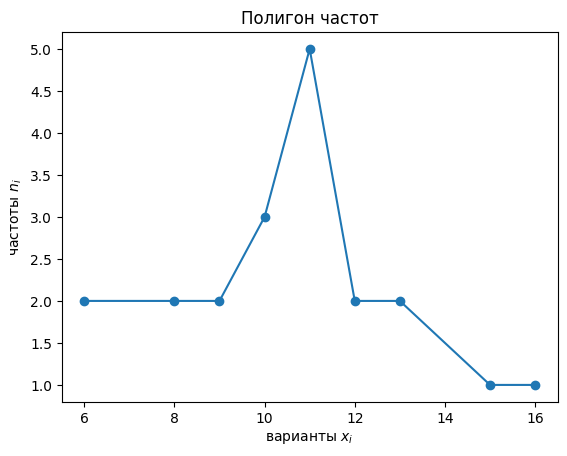

In [3]:
n = 20
x = np.linspace(0, n-1, n)
f = sts.binom(n=n, p=0.5)
random_values = f.rvs(n)
values = np.unique(random_values, return_counts=True)
x_i = values[0]
n_i = values[1]

plt.plot(x_i, n_i,'o-')
plt.title('Полигон частот')
plt.ylabel('частоты $n_i$')
plt.xlabel('варианты $x_i$')


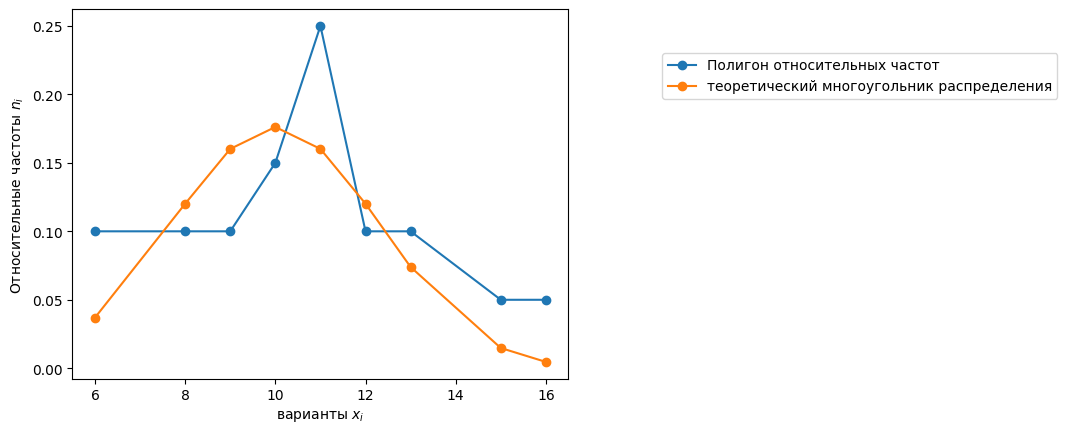

In [4]:
plt.plot(x_i, n_i/n,'o-', label="Полигон относительных частот")
plt.plot(x_i, f.pmf(x_i),'o-', label="теоретический многоугольник распределения")
plt.title('')
plt.ylabel('Относительные частоты $n_i$')
plt.xlabel('варианты $x_i$')
plt.legend(loc="upper right", bbox_to_anchor=(2, 0.9))
plt.show()

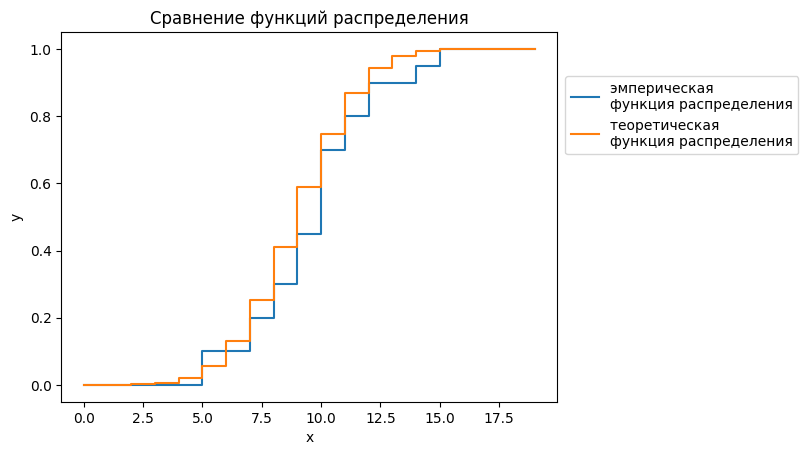

In [5]:
plt.step(x, empiric_cdf_list(x, random_values, n),'-', label="эмперическая \nфункция распределения")
plt.step(x, f.cdf(x),'-', label="теоретическая \nфункция распределения")
plt.title("Сравнение функций распределения")

plt.ylabel('y')
plt.xlabel('x')
plt.legend(loc="upper right", bbox_to_anchor=(1.5, 0.9))
plt.show()

In [6]:
print_stat(random_values)

Выборочная мода..............................: 11.00 - самое популярное значение признака
Выборочное cреднее значение..................: 10.60 - среднее значение признака
Медиана......................................: 11.00 - значение признака, меньше которого ровно половина значений
Выборочная дисперсия.........................: 6.34 квадрат среднеквадратического отклонения признака
Квартили.....................................: [6.0, 9.0, 11.0] - значение признака, меньше которого ровно 25%/50%/75% значений признака
Исправленная дисперсия.......................: 6.67 - квадрат исправленого среднеквадратического отклонения признака
Выборочное среднеквадратическое  отклонение..: 2.52 - среднее отклонение от среднего значения
Исправленное среднеквадратическое  отклонение: 2.58 - исправленое среднее отклонение от среднего значения признака


## Задание 2

Text(0.5, 0, 'Диапазоны')

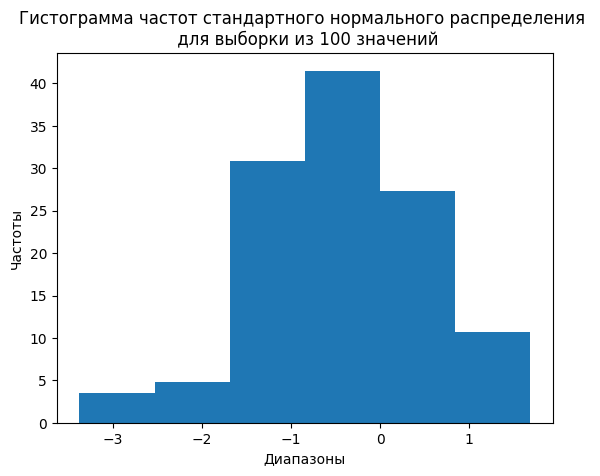

In [7]:
n = 100
x = np.linspace(-4, 4, n)
f = sts.norm()
random_values = f.rvs(n)

y_values = my_bar(random_values)
plt.bar(y_values[0], y_values[1], width=y_values[2])
plt.title(f"Гистограмма частот стандартного нормального распределения \n для выборки из {n} значений")
plt.ylabel('Частоты')
plt.xlabel('Диапазоны')

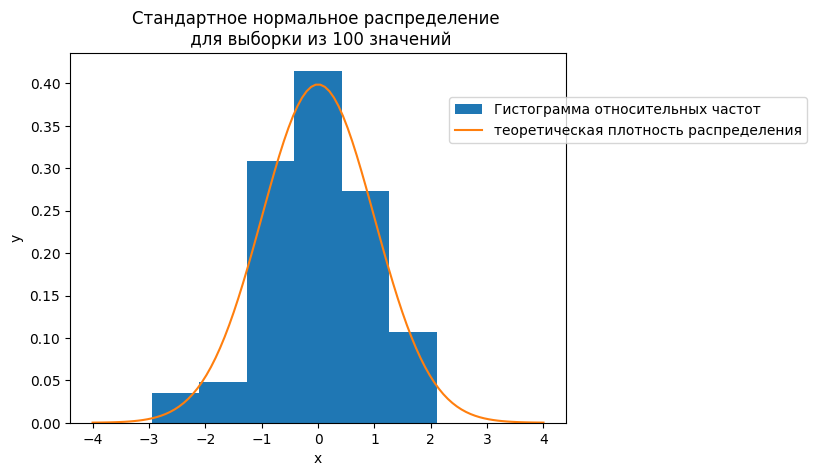

In [8]:
m = int(math.log2(n))
plt.hist(random_values, m, density=True, label="Гистограмма относительных частот")
plt.plot(x, f.pdf(x), label="теоретическая плотность распределения")
plt.title(f"Стандартное нормальное распределение \n для выборки из {n} значений")
plt.ylabel('y')
plt.xlabel('x')
plt.legend(loc="upper right", bbox_to_anchor=(1.5, 0.9))

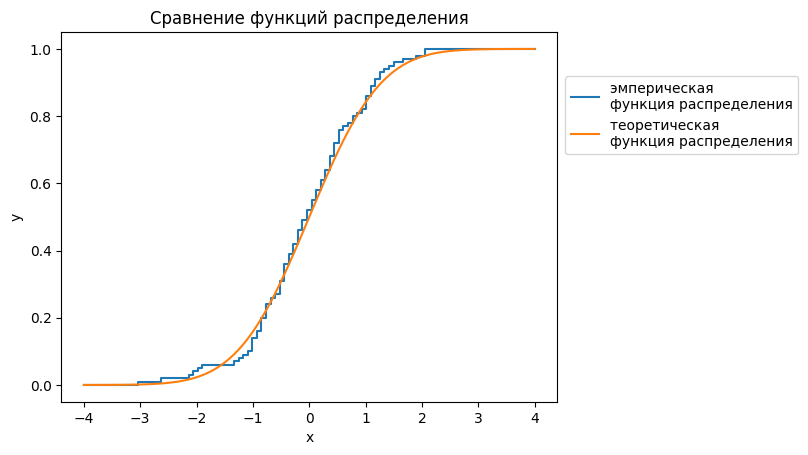

In [9]:
plt.step(x, empiric_cdf_list(x, random_values, n),'-', label="эмперическая \nфункция распределения")
plt.plot(x, f.cdf(x),'-', label="теоретическая \nфункция распределения")
plt.title("Сравнение функций распределения")

plt.ylabel('y')
plt.xlabel('x')
plt.legend(loc="upper right", bbox_to_anchor=(1.5, 0.9))
plt.show()

In [10]:
print_stat(random_values)

Выборочная мода..............................: -2.95 - самое популярное значение признака
Выборочное cреднее значение..................: -0.00 - среднее значение признака
Медиана......................................: -0.01 - значение признака, меньше которого ровно половина значений
Выборочная дисперсия.........................: 0.95 квадрат среднеквадратического отклонения признака
Квартили.....................................: [-2.95, -0.66, -0.01] - значение признака, меньше которого ровно 25%/50%/75% значений признака
Исправленная дисперсия.......................: 0.95 - квадрат исправленого среднеквадратического отклонения признака
Выборочное среднеквадратическое  отклонение..: 0.97 - среднее отклонение от среднего значения
Исправленное среднеквадратическое  отклонение: 0.98 - исправленое среднее отклонение от среднего значения признака


## Задание 3

In [11]:
df = pd.read_csv("Lab_06/Вариант 7.3.csv")
df.head()

,Age,Education,Geography,EstimatedSalary,Tenure
0,30,Bachelors,Germany,42933.26,3
1,29,Masters,Spain,117173.80,2
2,46,Masters,France,140130.22,7
3,58,Bachelors,Germany,5097.67,1
4,34,PHD,Spain,66695.71,9


1. Age – возраст клиента:
    1. признак количественный, т.к. значения признака имеют числовое выражения, а также арефметические операции над этими значениями будут осмыслены: разница возраста, суммарный возраст, средний возраст;
    2. шкала измерения - абсолютная, т.к. начало измерения и единица измерения фиксированы (0 лет и 1 год соответственно);
    3. признак является дискретным, т.к. множество его значений - расширенные натуральные числа, а множество натуральных чисел счётно. По определению признак является дискретным, если множество его значений конечно или счётно.

2. Education – уровень образования:
    1. признак категориальный, т.к. значения признака не имеют числового выражения, а также арифметические операции над этими значениями не будут осмыслены. Признак порядковый, т.к. на множестве уровня образования можно ввести осмысленное отношение порядка:
    ... < Bachelor < Master < Doctor < ...
    2. шкала измерения - шкала порядка, т.к. на множестве значений можно ввести отношения порядка;
    3. признак является дискретным, т.к. множество его значений конечно.

3. Geography – страна проживания:
    1. признак категориальный, т.к. значения признака не имеют числового выражения, а также арифметические операции над этими значениями не будут осмыслены. Признак номинальный, т.к. на множестве страны проживания нельзя ввести осмысленное отношение порядка;
    2. шкала измерения - номинальная, т.к. на множестве значений нельзя ввести отношение порядка;
    3. признак является дискретным, т.к. множество его значений конечно.

4. EstimatedSalary – расчетная заработная плата (при условии, что зарплата начисляется в одной валюте):
    1. признак количественный, т.к. значения признака имеют числовые выражения, а также арефметические операции над этими значениями будут осмыслены;
    2. шкала измерения - аюсолютная, т.к. начало измерения и единица измерения фиксированы (0 и 1 денежная единица соответственно);
    3. признак является дискретными, т.к. множество его значений - рациональные числа (не божет быть зарплаты √2 копеек), а множество рациональных чисел счётно. По определению признак является дискретным, если множество его значений конечно или счётно.

5. Tenure – сколько лет является клиентом банка:
    1. признак количественный, т.к. значения признака имеют числовое выражения, а также арефметические операции над этими значениями будут осмыслены: разница лет, суммарное количество лет, среднее количество лет;
    2. шкала измерения - абсолютная, т.к. начало измерения и единица измерения фиксированы (0 лет и 1 год соответственно);
    3. признак является дискретным, т.к. множество его значений - расширенные натуральные числа, а множество натуральных чисел счётно. По определению признак является дискретным, если множество его значений конечно или счётно.

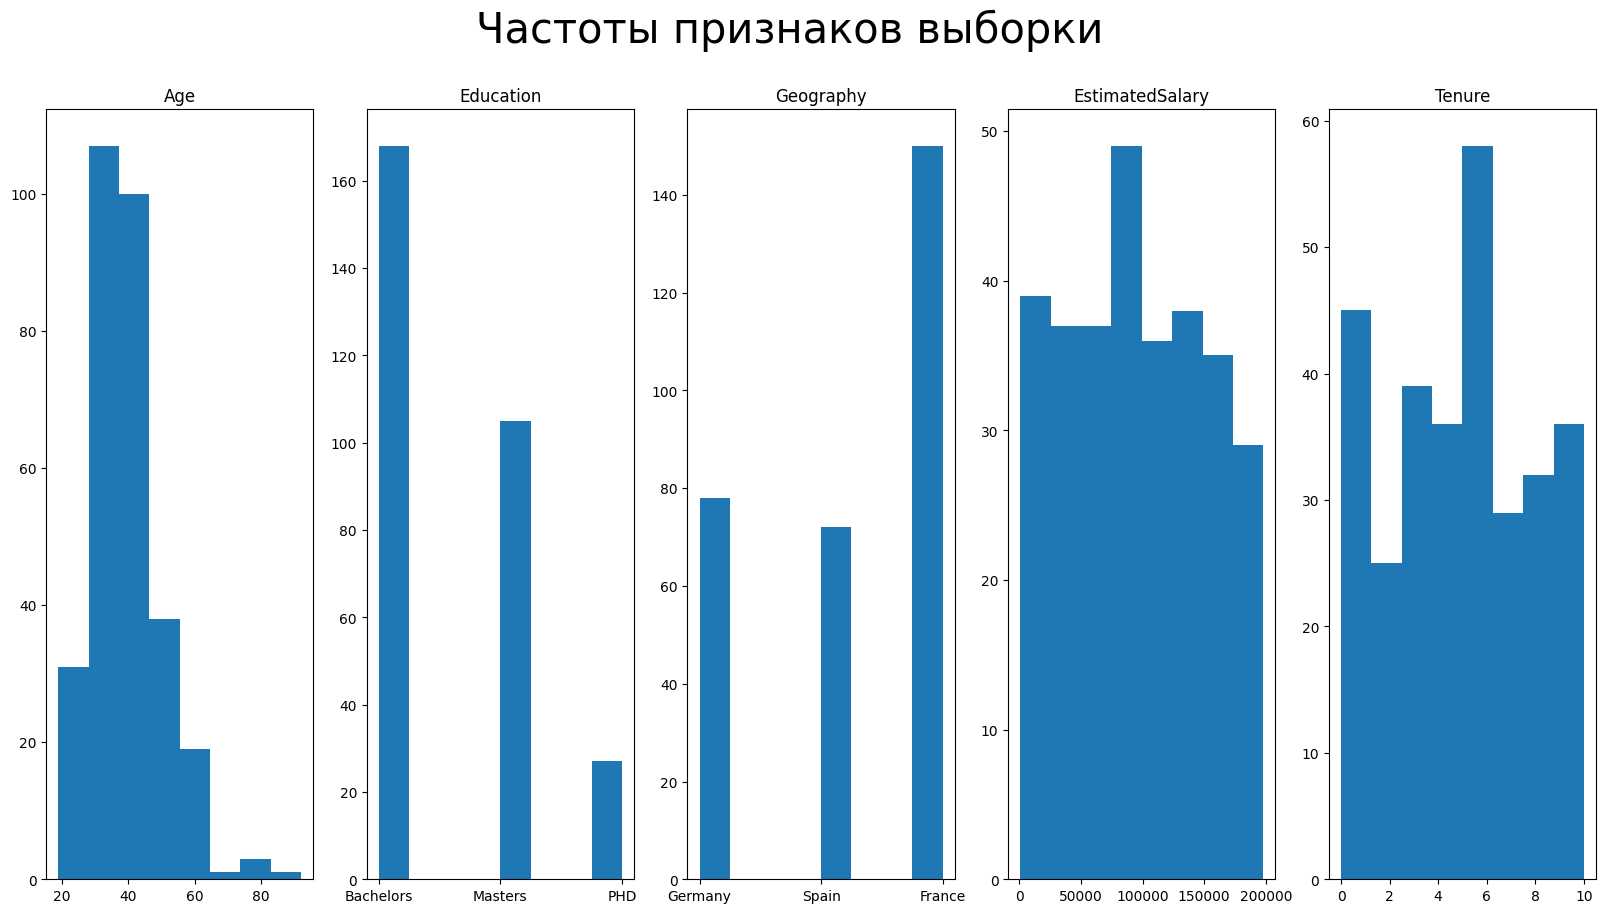

In [12]:
fig, ax = plt.subplots(1, len(df.columns))
fig.set_size_inches(20, 10)
fig.suptitle('Частоты признаков выборки ', fontsize=30)
for i, column_name in enumerate(df.columns):

    column = df[column_name]
    if len(column) == 0:
      continue
    if column[0] == str:
      y_values = my_bar(column)
      ax[i].bar(y_values[0], y_values[1], width=y_values[2])
    else:
      m = int(math.log2(len(column)))
      ax[i].hist(column, m, density=False)
    ax[i].set_title(column_name)



In [13]:
for i, column_name in enumerate(df.columns):
    print(f"{i+1} - {column_name}:")
    print_stat(df[column_name])
    print()

1 - Age:
Выборочная мода..............................: 37.00 - самое популярное значение признака
Выборочное cреднее значение..................: 39.70 - среднее значение признака
Медиана......................................: 39.00 - значение признака, меньше которого ровно половина значений
Выборочная дисперсия.........................: 112.59 квадрат среднеквадратического отклонения признака
Квартили.....................................: [19.0, 33.0, 39.0] - значение признака, меньше которого ровно 25%/50%/75% значений признака
Исправленная дисперсия.......................: 112.97 - квадрат исправленого среднеквадратического отклонения признака
Выборочное среднеквадратическое  отклонение..: 10.61 - среднее отклонение от среднего значения
Исправленное среднеквадратическое  отклонение: 10.63 - исправленое среднее отклонение от среднего значения признака

2 - Education:
Выборочная мода..............................: Bachelors - самое популярное значение признака

3 - Geography:
Выбороч

1. Age: для абсолютной шкалы можно вычислить любые оценки.
2. Education: для порядковой шкалы моржно вычислить только лишь моду.
3. Geography: для номинальной шкалы моржно вычислить только лишь моду.
4. EstimatedSalary: для абсолютной шкалы можно вычислить любые оценки.
5. Tenure: для абсолютной шкалы можно вычислить любые оценки.

## Задание 4

In [14]:
df = pd.read_csv("Lab_06/Вариант 7.4.csv").dropna()
g = 0.95

In [15]:
for column_name in df.columns:
  lenn = len(column)
  column = df[column_name]
  ss = np.std(column, ddof=1)
  m = column.mean()
  print(f"""Признак: {column_name}
Объём выборки: {lenn}
Выборочное среднее m: {m:.02f}
Исправленное cреднеквадратическое отклонение σ: {ss:.02f}
        """)


  if column_name == 'X':
    s = 0.5
    v = s/lenn**0.5
    inter_m = sts.norm(m, v).interval(g)
    f = sts.norm().ppf((g+1)/2)
    my_inter_m = [m-v*f, m+v*f]

  if column_name == 'Y':
    v = ss/lenn**0.5
    inter_m = sts.t(lenn-1, m, v).interval(g)
    f = sts.t(lenn-1).ppf((g+1)/2)
    my_inter_m = [m-v*f, m+v*f]

  xi_1 = sts.chi2(lenn-1).ppf((1-g)/2)
  xi_2 = sts.chi2(lenn-1).ppf((1+g)/2)
  my_inter_s = [ss*((lenn-1)**0.5)/xi_2**0.5, ss*((lenn-1)**0.5)/xi_1**0.5]

  print(f"""Доверительный интервал для параметра m (рассчитанный функцией): [{inter_m[0]:.02f}; {inter_m[1]:.02f}]
Неравеносто выполняется: {inter_m[0]:.02f} < {m:.02f} < {inter_m[1]:.02f}

Доверительный интервал для параметра m (рассчитанный по формуле): [{my_inter_m[0]:.02f}; {my_inter_m[1]:.02f}]
Неравеносто выполняется: {my_inter_m[0]:.02f} < {m:.02f} < {my_inter_m[1]:.02f}

Доверительный интервал для параметра σ (рассчитанный по формуле): [{my_inter_s[0]:.02f}; {my_inter_s[1]:.02f}]
Неравеносто выполняется: {my_inter_s[0]:.02f} < {ss:.02f} < {my_inter_s[1]:.02f}
""")





Признак: X
Объём выборки: 300
Выборочное среднее m: 1.97
Исправленное cреднеквадратическое отклонение σ: 0.48
        
Доверительный интервал для параметра m (рассчитанный функцией): [1.92; 2.03]
Неравеносто выполняется: 1.92 < 1.97 < 2.03

Доверительный интервал для параметра m (рассчитанный по формуле): [1.92; 2.03]
Неравеносто выполняется: 1.92 < 1.97 < 2.03

Доверительный интервал для параметра σ (рассчитанный по формуле): [0.44; 0.52]
Неравеносто выполняется: 0.44 < 0.48 < 0.52

Признак: Y
Объём выборки: 90
Выборочное среднее m: 16.72
Исправленное cреднеквадратическое отклонение σ: 6.23
        
Доверительный интервал для параметра m (рассчитанный функцией): [15.41; 18.02]
Неравеносто выполняется: 15.41 < 16.72 < 18.02

Доверительный интервал для параметра m (рассчитанный по формуле): [15.41; 18.02]
Неравеносто выполняется: 15.41 < 16.72 < 18.02

Доверительный интервал для параметра σ (рассчитанный по формуле): [5.43; 7.30]
Неравеносто выполняется: 5.43 < 6.23 < 7.30



In [18]:
X = df["X"]
print("Признак Х:\n")
for i in [0.99, 0.9, 0.8, 0.7]:
    s = 0.5
    v = s/lenn**0.5
    inter_m = sts.norm(m, v).interval(i)
    print(f"""Доверительный интервал для параметра m с значением надёжности {i}: [{inter_m[0]:.02f}; {inter_m[1]:.02f}]
Длинна интервала: {(inter_m[1] - inter_m[0]):.02f}
""")
    




Признак Х:

Доверительный интервал для параметра m с значением надёжности 0.99: [16.58; 16.85]
Длинна интервала: 0.27

Доверительный интервал для параметра m с значением надёжности 0.9: [16.63; 16.80]
Длинна интервала: 0.17

Доверительный интервал для параметра m с значением надёжности 0.8: [16.65; 16.78]
Длинна интервала: 0.14

Доверительный интервал для параметра m с значением надёжности 0.7: [16.66; 16.77]
Длинна интервала: 0.11



С уменьшением значения надёжности длинна доверительного интервала уменьшается